In [ ]:
# Unsupervised Learning in agriculture: Dry Beans classification after high quality measurements

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

In [23]:
dataset = pd.read_excel('Dataset/Dry_Bean_Dataset.xlsx', header=0);print(dataset.shape);dataset.head()

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [24]:
# This problem is going to be handle as nonsupervised learning
dataset.drop('Class', axis=1, inplace=True); dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


In [25]:
dataset.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [26]:
# Analysing feature ConvexArea
dataset.where(dataset['ConvexArea']> 3 * dataset['ConvexArea'].std()).sum().sort_values(ascending=False)

ConvexArea         1.126738e+08
Area               1.111217e+08
Perimeter          1.090174e+06
MajorAxisLength    4.088871e+05
EquivDiameter      3.206506e+05
MinorAxisLength    2.539872e+05
AspectRation       1.201464e+03
ShapeFactor4       7.358270e+02
Solidity           7.316147e+02
roundness          6.329780e+02
Compactness        5.821582e+02
Eccentricity       5.790396e+02
Extent             5.711918e+02
ShapeFactor3       4.575619e+02
ShapeFactor1       2.860330e+00
ShapeFactor2       6.668060e-01
dtype: float64

<Axes: xlabel='ConvexArea', ylabel='Density'>

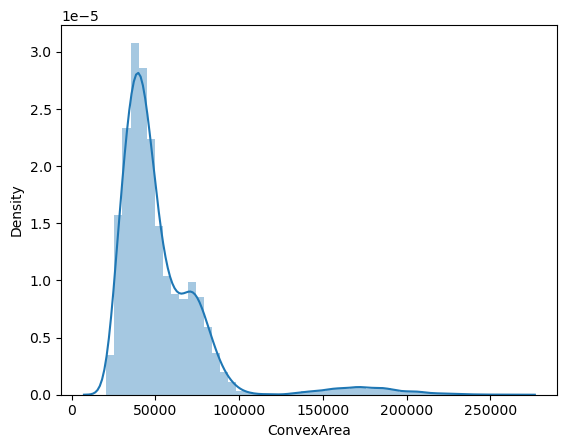

In [27]:
sns.distplot(dataset['ConvexArea'], kde=True)

In [28]:
dataset.drop('ConvexArea', axis=1, inplace=True)

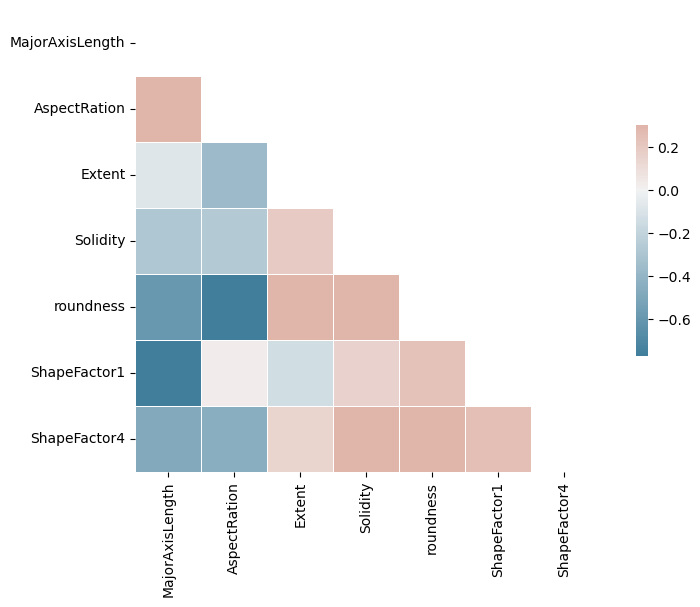

In [45]:
# Generate correlation matrix
corr = dataset.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [46]:
threshold = 0.8
filtered_corr_matrix = corr.where(abs(corr) < threshold, np.nan)
filtered_corr_matrix

,MajorAxisLength,AspectRation,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor4
MajorAxisLength,NaN,0.550335,-0.078062,-0.284302,-0.596358,-0.773609,-0.482527
AspectRation,0.550335,NaN,-0.370184,-0.267754,-0.766979,0.024593,-0.449264
Extent,-0.078062,-0.370184,NaN,0.191389,0.344411,-0.141616,0.148502
Solidity,-0.284302,-0.267754,0.191389,NaN,0.607150,0.153388,0.702163
roundness,-0.596358,-0.766979,0.344411,0.607150,NaN,0.230273,0.472149
ShapeFactor1,-0.773609,0.024593,-0.141616,0.153388,0.230273,NaN,0.248619
ShapeFactor4,-0.482527,-0.449264,0.148502,0.702163,0.472149,0.248619,NaN


In [47]:
filtered_corr_matrix.isna().sum().sort_values(ascending=False)

MajorAxisLength    1
AspectRation       1
Extent             1
Solidity           1
roundness          1
ShapeFactor1       1
ShapeFactor4       1
dtype: int64

In [32]:
dataset.drop(dataset[['ShapeFactor2', 'Area', 'Perimeter']], axis=1, inplace=True)

In [36]:
dataset.drop(dataset[['MinorAxisLength', 'Eccentricity']], axis=1, inplace=True)

In [40]:
dataset.drop(dataset[['EquivDiameter', 'ShapeFactor3']], axis=1, inplace=True)

In [44]:
dataset.drop(dataset[['Compactness']], axis=1, inplace=True)

In [54]:
#Scaling data
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

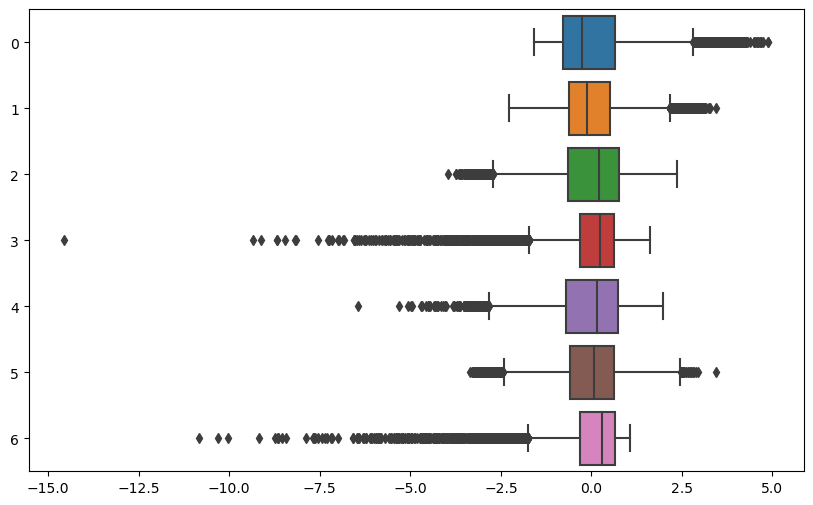

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_scaled, orient='h')
plt.show()

In [71]:
%%time
# Hyperparameters tunning for DBSCAN: finding best model fitting this dataset using silhouette_score
eps_range = [0.5,0.6,0.7,0.8,0.9]
min_samples = range(3,6)
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = range(5,40,10)
dict_scoring = {'eps': -1000, 'min_samples': -1000, 'score': -1000}
for algo in algorithm:
    for ep in eps_range:
        for min_s in min_samples:
            for leaf in leaf_size:
                clustering = DBSCAN(eps=ep, min_samples=min_s, algorithm = algo, n_jobs=-1, metric='euclidean', leaf_size = leaf).fit(dataset_scaled)
                labels = clustering.labels_
                score = silhouette_score(dataset_scaled, labels)
                if score > dict_scoring['score']:
                    dict_scoring['algorithm'] = algo
                    dict_scoring['score'] = score
                    dict_scoring['eps'] = ep
                    dict_scoring['min_samples'] = min_s
                    dict_scoring['leaf_size'] = leaf
print(dict_scoring)

{'eps': 0.9, 'min_samples': 5, 'score': 0.2821837366746962, 'algorithm': 'auto', 'leaf_size': 5}
CPU times: user 33min 46s, sys: 7min 12s, total: 40min 59s
Wall time: 7min 35s


In [72]:
#Best model
best_fit_DBSCAN = DBSCAN(eps = dict_scoring['eps'],
                min_samples = dict_scoring['min_samples'],
                algorithm = dict_scoring['algorithm'],
                leaf_size = dict_scoring['leaf_size'],
                metric = 'euclidean',
                n_jobs = -1
               )
best_fit_DBSCAN.fit(dataset_escaled)

dataset['class'] = best_fit_DBSCAN.labels_

In [73]:
dataset['class'].unique()

array([ 0, -1,  1,  2,  3])

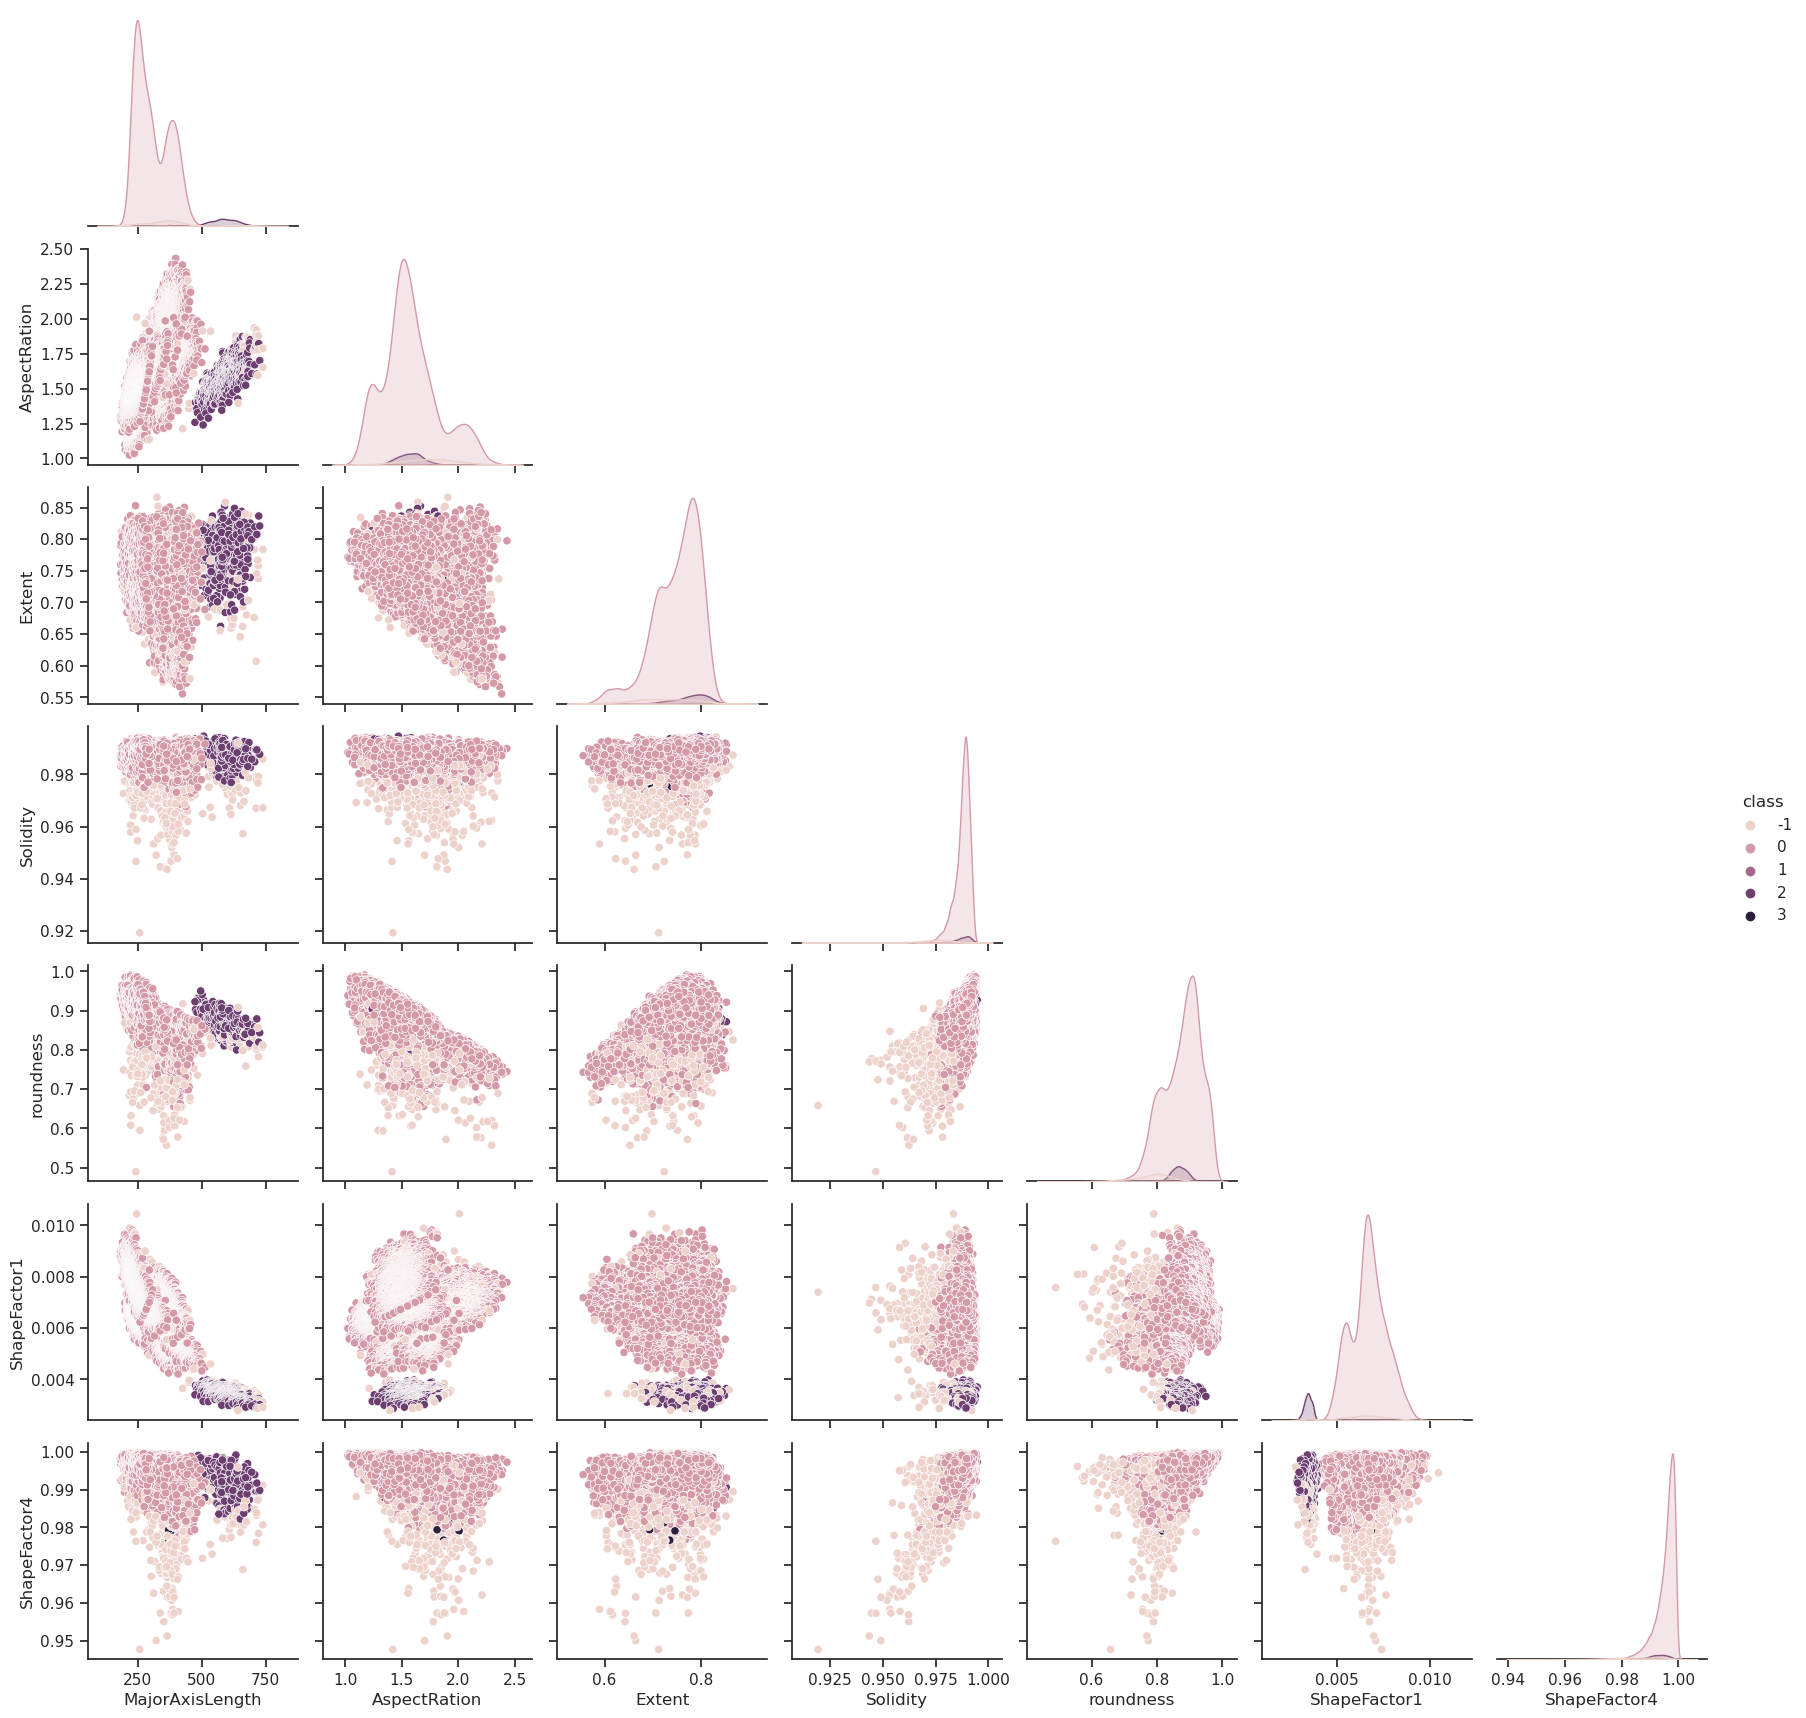

In [78]:
sns.color_palette("hls", 8)
sns.pairplot(dataset[['MajorAxisLength', 'AspectRation', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor4', 'class']], hue='class', corner=True)